In [1]:
import os

ls = os.listdir
ls('../dataset')

['no', 'yes']

In [2]:
train_dir = "train"
val_dir = "valid"

dirs = ["train","train/yes", "train/no", "valid", "valid/yes", "valid/no"]

for _dir in dirs:
    if not os.path.exists(_dir):
        os.mkdir(_dir)

print(ls("train"))
print(ls("valid"))

['no', 'yes']
['no', 'yes']


In [3]:
imgs_yes = "../dataset/yes"
imgs_no = "../dataset/no"

part_yes = round(0.8 * len(ls(imgs_yes)))
part_no = round(0.8 * len(ls(imgs_no)))

train_yes = ls(imgs_yes)[0:part_yes]
train_no = ls(imgs_no)[0:part_no]

valid_yes = ls(imgs_yes)[part_yes:]
valid_no = ls(imgs_no)[part_no:]

for img in train_yes:
    os.system(f"cp {imgs_yes}/{img} train/yes/{img}")
    
for img in train_no:
    os.system(f"cp {imgs_no}/{img} train/no/{img}")
    
for img in valid_yes:
    os.system(f"cp {imgs_yes}/{img} valid/yes/{img}")

for img in valid_no:
    os.system(f"cp {imgs_no}/{img} valid/no/{img}")

In [4]:
training_dir = 'train/'
valid_dir = "valid/"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                )

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 147 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data=valid_generator)

Epoch 1/20
5/5 [==============================] - 6s 1s/step - loss: 0.5342 - accuracy: 0.7347 - val_loss: 0.4032 - val_accuracy: 0.8611
Epoch 2/20
5/5 [==============================] - 5s 1s/step - loss: 0.4570 - accuracy: 0.8435 - val_loss: 0.3945 - val_accuracy: 0.8611
Epoch 3/20
5/5 [==============================] - 5s 963ms/step - loss: 0.4465 - accuracy: 0.8435 - val_loss: 0.3915 - val_accuracy: 0.8611
Epoch 4/20
5/5 [==============================] - 6s 1s/step - loss: 0.4449 - accuracy: 0.8435 - val_loss: 0.3900 - val_accuracy: 0.8611
Epoch 5/20
5/5 [==============================] - 5s 930ms/step - loss: 0.4403 - accuracy: 0.8435 - val_loss: 0.3893 - val_accuracy: 0.8611
Epoch 6/20
5/5 [==============================] - 5s 1s/step - loss: 0.4372 - accuracy: 0.8435 - val_loss: 0.3916 - val_accuracy: 0.8611
Epoch 7/20
5/5 [==============================] - 5s 954ms/step - loss: 0.4398 - accuracy: 0.8435 - val_loss: 0.3912 - val_accuracy: 0.8611
Epoch 8/20
5/5 [================

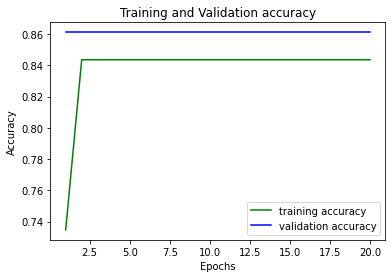

In [8]:
import matplotlib.pyplot as plt

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,acc_train, 'g', label='training accuracy')
plt.plot(epochs, acc_val, 'b', label= 'validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()